<a href="https://colab.research.google.com/github/KOLIPAKA-VENKATA-AMARNATH/LDA_Lab_assignment/blob/main/LDA_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Loading and Scaling Data
Data standardized - Mean: -0.0
Data standardized - Std Dev: 1.0

Step 2: Performing LDA Transformation
Original shape: (150, 4)
Shape after LDA: (150, 2)
LDA variance ratio: [0.9912 0.0088]

Step 3: Performing PCA Transformation
PCA variance ratio: [0.7296 0.2285]

Step 4: Visualizing Results


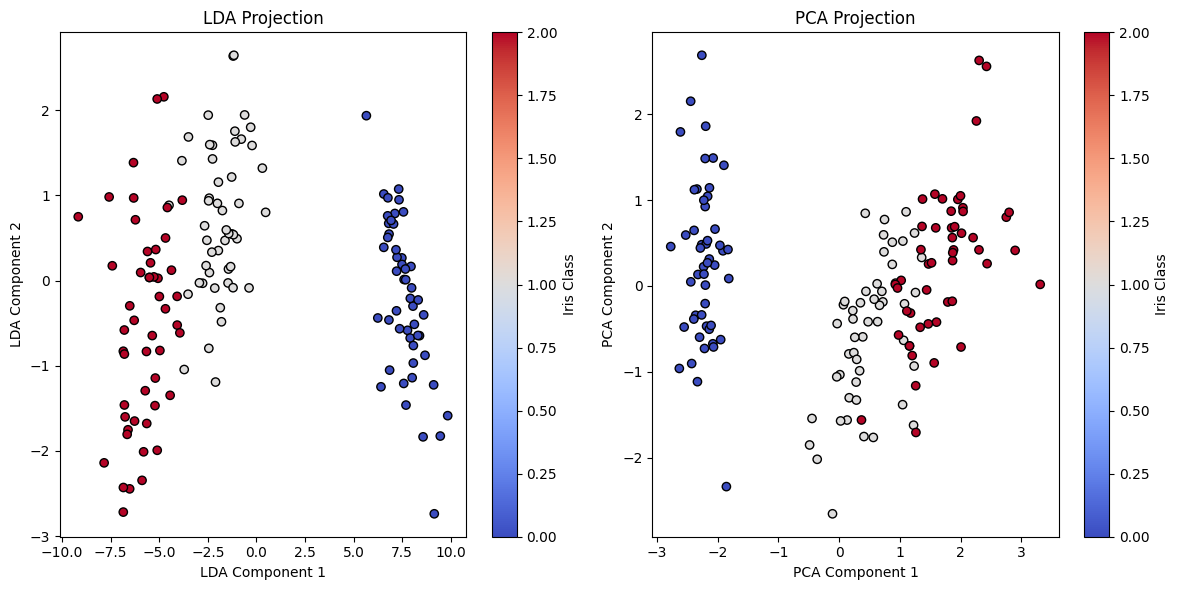


Step 5: Analyzing Class Separation
LDA interclass distance (between class 0 and 1): 9.4797
PCA interclass distance (between class 0 and 1): 2.8476

Summary:
- LDA is designed for maximizing class separation, which is ideal for classification tasks.
- PCA is optimized to capture variance across all features, making it well-suited for exploratory data analysis.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
import seaborn as sns

def analyze_iris_with_lda_pca():
    # Step 1: Load and Scale Data
    print("Step 1: Loading and Scaling Data")
    iris = load_iris()
    features, target = iris.data, iris.target
    feature_labels = iris.feature_names

    # Standardizing features for optimal performance
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)
    print("Data standardized - Mean:", round(scaled_features.mean(), 4))
    print("Data standardized - Std Dev:", round(scaled_features.std(), 4))

    # Step 2: Apply LDA for dimensionality reduction
    print("\nStep 2: Performing LDA Transformation")
    lda_model = LDA(n_components=2)
    lda_features = lda_model.fit_transform(scaled_features, target)
    print("Original shape:", features.shape)
    print("Shape after LDA:", lda_features.shape)
    print("LDA variance ratio:", lda_model.explained_variance_ratio_.round(4))

    # Step 3: Apply PCA for comparison
    print("\nStep 3: Performing PCA Transformation")
    pca_model = PCA(n_components=2)
    pca_features = pca_model.fit_transform(scaled_features)
    print("PCA variance ratio:", pca_model.explained_variance_ratio_.round(4))

    # Step 4: Plotting results
    print("\nStep 4: Visualizing Results")
    plt.figure(figsize=(12, 6))

    # LDA plot
    plt.subplot(1, 2, 1)
    lda_plot = plt.scatter(lda_features[:, 0], lda_features[:, 1], c=target, cmap='coolwarm', edgecolor='k')
    plt.title("LDA Projection")
    plt.xlabel("LDA Component 1")
    plt.ylabel("LDA Component 2")
    plt.colorbar(lda_plot, label="Iris Class")

    # PCA plot
    plt.subplot(1, 2, 2)
    pca_plot = plt.scatter(pca_features[:, 0], pca_features[:, 1], c=target, cmap='coolwarm', edgecolor='k')
    plt.title("PCA Projection")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.colorbar(pca_plot, label="Iris Class")

    plt.tight_layout()
    plt.show()

    # Step 5: Analysis and Class Separation Evaluation
    print("\nStep 5: Analyzing Class Separation")

    # Compute class means for each transformation
    lda_means = [lda_features[target == label].mean(axis=0) for label in np.unique(target)]
    pca_means = [pca_features[target == label].mean(axis=0) for label in np.unique(target)]

    # Calculate distance between two classes (0 and 1) for comparison
    lda_distance = np.linalg.norm(lda_means[0] - lda_means[1])
    pca_distance = np.linalg.norm(pca_means[0] - pca_means[1])

    print(f"LDA interclass distance (between class 0 and 1): {lda_distance:.4f}")
    print(f"PCA interclass distance (between class 0 and 1): {pca_distance:.4f}")

    print("\nSummary:")
    print("- LDA is designed for maximizing class separation, which is ideal for classification tasks.")
    print("- PCA is optimized to capture variance across all features, making it well-suited for exploratory data analysis.")

if __name__ == "__main__":
    analyze_iris_with_lda_pca()

